# Imports

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten einlesen und als DF speichern

In [13]:
data = pd.read_csv("./Airbnb_Open_Data.csv")
df = pd.DataFrame(data)

/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_19712/3868666871.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./Airbnb_Open_Data.csv")


# Grobe Übersicht der Daten erhalten

In [14]:
df.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


In [15]:
df.sample(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
24814,14706108,Brooklyn Backyard Oasis,15637903031,verified,Magnus,Brooklyn,Bay Ridge,40.62992,-74.01753,United States,...,$173,7.0,1.0,8/7/2018,0.09,5.0,1.0,3.0,Keep the apartment clean,NaN
78255,44221573,Quiet comfortable near Times Sq.,76151128682,unconfirmed,Maya,Manhattan,Hell's Kitchen,40.75860,-73.98974,United States,...,$135,2.0,144.0,7/1/2019,5.11,1.0,1.0,73.0,"No parties, no extra guests, no pets, no smoki...",NaN
78545,44381740,Cute RM in Private Home with Backyard/Near Metro,75374129093,verified,Armando,Bronx,Fordham,40.86917,-73.89465,United States,...,$151,3.0,77.0,5/30/2019,2.70,1.0,10.0,65.0,ALCOHOL IS STRICTLY NOT ALLOWED INSIDE THE HOU...,NaN
20757,12465427,Cozy Studio in the Heart of Manhattan,7038277468,verified,Helena & Greg,Manhattan,Kips Bay,40.74081,-73.98018,United States,...,$114,5.0,1.0,1/2/2017,0.03,2.0,1.0,0.0,"Please be respectful, this really is our home ...",NaN
11039,7098176,Shared Studio (NO PRIVACY) On The Upper East Side,2767318320,unconfirmed,Brianna,Manhattan,Upper East Side,40.78510,-73.95254,United States,...,$235,1.0,104.0,6/23/2019,2.26,1.0,1.0,26.0,We do not allow any pets on the property to pr...,NaN
65312,37073154,Charming 2BR Apartment in Midtown Manhattan,13720457294,verified,Jose,Manhattan,Midtown,40.75645,-73.96576,United States,...,$234,30.0,35.0,6/15/2021,1.03,4.0,1.0,0.0,NaN,NaN
40832,23552850,Manhattan Studio 4,27175091265,verified,J Danny,Manhattan,Midtown,40.74827,-73.98865,United States,...,$51,3.0,2.0,6/4/2019,0.51,3.0,2.0,29.0,NaN,NaN
93413,52593336,"Comfort, light and calm just 3 minutes from mi...",95355064309,verified,Fiorella,Manhattan,Roosevelt Island,40.75988,-73.95097,United States,...,$201,2.0,3.0,4/10/2018,0.20,4.0,2.0,300.0,Please remember that this is a residential bui...,NaN
55794,31816362,The Vanderbilt Executive,83169849409,verified,Stay With Vibe,Manhattan,Murray Hill,40.74909,-73.97740,United States,...,$197,30.0,5.0,2/1/2022,0.38,5.0,108.0,308.0,NaN,NaN
75421,42656354,Manhattan Club Suite,71973827981,unconfirmed,Hosteeva,Manhattan,Midtown,40.76425,-73.98090,United States,...,$59,1.0,0.0,NaN,NaN,2.0,8.0,0.0,NaN,NaN


In [16]:
df.tail(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102589,6089676,Lrg room 1 block from Prospect Park,74549151787,unconfirmed,Dave,Brooklyn,Flatbush,40.65231,-73.96189,United States,...,$61,3.0,0.0,NaN,NaN,1.0,1.0,200.0,House Rules 1. Check-in is 4 pm local time. If...,NaN
102590,6090228,Wonderful artists' loft in Brooklyn,9184535139,unconfirmed,Daniel,Brooklyn,Crown Heights,40.66673,-73.96127,United States,...,$50,1.0,0.0,NaN,NaN,1.0,1.0,276.0,#NAME?,NaN
102591,6090781,Columbus Ave Apt 1 block from Park,50908010324,verified,Lawrence,Manhattan,Upper West Side,40.77408,-73.98181,United States,...,$228,5.0,17.0,1/4/2019,0.35,5.0,1.0,134.0,#NAME?,NaN
102592,6091333,3BR/1 Ba in TriBeCa w/ outdoor deck,53266862889,unconfirmed,Nick,Manhattan,Tribeca,40.71845,-74.01183,United States,...,$157,1.0,0.0,NaN,NaN,2.0,1.0,177.0,Guests should treat my home as if it were thei...,NaN
102593,6091885,"Welcoming, Clean, Cheap on St Marks",33188605074,verified,Felipe,Manhattan,East Village,40.72826,-73.98422,United States,...,$220,1.0,8.0,9/6/2015,0.16,4.0,2.0,152.0,* No smoking indoors. * No pets * No loud/la...,NaN
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [18]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


# Minimale Buchungsdauer der Nächte. Warum ist dies negativ? Für die analyse droppen?

In [22]:
df[df["minimum nights"] < 0]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,...,$231,-10.0,213.0,6/24/2019,2.00,5.0,2.0,19.0,There is no smoking on the property. No outsid...,NaN
352,1195746,"Beautiful, Bright’s, Warm & Spacious 1.5BR Apt",2227683633,unconfirmed,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,NaN,...,$15,-5.0,104.0,6/21/2019,1.04,5.0,1.0,31.0,We are a second-floor apartment so please do n...,NaN
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,...,$156,-1.0,82.0,5/19/2019,0.94,2.0,2.0,131.0,"no inside smoking, quiet(ish) after 11, help y...",NaN
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,...,$175,-10.0,68.0,6/10/2019,0.69,5.0,1.0,13.0,NaN,NaN
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,...,$184,-12.0,203.0,7/6/2019,2.14,5.0,3.0,77.0,NaN,NaN
478,1265335,Charming upper west side apartment,89878315253,unconfirmed,Alen,Manhattan,Upper West Side,40.77886,-73.98042,United States,...,$82,-2.0,129.0,6/7/2019,1.33,2.0,1.0,381.0,Please remember that this is a residential bui...,NaN
525,1291294,Chateau Style Brooklyn Loft for Singles or Cou...,2631536622,verified,Carlos,Brooklyn,Bedford-Stuyvesant,40.68967,-73.95445,United States,...,$83,-3.0,42.0,5/18/2019,0.44,5.0,1.0,292.0,BUILDING IS RESIDENTIAL. DOCTORS AND NURSES WH...,NaN
42446,24444262,"Cozy room in bright, spacious apartment",84040511136,verified,Steven,Bronx,Hunts Point,40.81731,-73.89052,United States,...,$240,-1223.0,0.0,NaN,NaN,2.0,4.0,341.0,Smoking is strictly prohibited. Your pets are ...,NaN
42500,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,2679070022,unconfirmed,Tom,Manhattan,Hell's Kitchen,40.76694,-73.98773,United States,...,$142,-365.0,13.0,7/7/2019,5.91,4.0,4.0,0.0,Please pick up/drop packet with front desk con...,NaN
42538,24495073,Newly Renovated Garden Apartment,98469733112,verified,Margie,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,United States,...,$17,-200.0,3.0,4/23/2019,1.06,2.0,1.0,157.0,No smoking or pets allowed and we request that...,NaN


# Die Verfügbarkeit des Angebots x Tage in der Zukunft, wie im Kalender festgelegt. Heißt dass das die Angebote nicht mehr Verfügbar sind? Also -10 = seit 10 Tagen kann man dieses Airbnb nicht mehr buchen?

In [24]:
df[df["availability 365"] < 0]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
139,1078106,FLAT MACDONOUGH,12359551036,unconfirmed,Frederick,Brooklyn,Bedford-Stuyvesant,40.68296,-73.93662,United States,...,$119,NaN,227.0,6/23/2019,2.09,5.0,2.0,-10.0,NaN,NaN
142,1079763,"Sun-drenched, artsy modernist 1 BDRM duplex",83716006050,unconfirmed,Kellan,Brooklyn,Williamsburg,40.71561,-73.94835,United States,...,$132,NaN,10.0,NaN,0.10,5.0,1.0,-2.0,Quiet after 11pm. Other guests sleeping.,NaN
170,1095227,New York room with a view,95792367490,NaN,Dexter,Staten Island,St. George,40.64524,-74.08088,United States,...,$203,131.0,166.0,6/13/2019,1.66,4.0,1.0,-1.0,Please tell me about who you will be traveling...,NaN
236,1131679,NaN,74291995690,unconfirmed,Cameron,Manhattan,East Harlem,40.79163,-73.94573,United States,...,$210,28.0,183.0,9/29/2018,1.83,2.0,2.0,-6.0,- We have school age children and request that...,NaN
251,1139963,B NYC Staten Alternative...,13992927619,NaN,Fowler,Staten Island,Tompkinsville,40.63627,-74.08543,United States,...,$157,2.0,147.0,NaN,NaN,NaN,6.0,-1.0,"Rules are detailed in the House Manual, which ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86735,48905077,Comfortable 2 BR in East Village/Cooper Square,66319244844,unconfirmed,Cooper,Manhattan,East Village,40.72627,-73.99145,United States,...,$67,3.0,27.0,4/23/2019,0.76,5.0,1.0,-4.0,No Smoking in the Apartment. Pretty laid back...,NaN
86764,48921093,"Beautiful hip location, with a light of sunshine.",11182626298,verified,Noemi,Queens,Ridgewood,40.70971,-73.89741,United States,...,$121,28.0,1.0,9/15/2018,0.10,4.0,1.0,-2.0,NaN,NaN
86790,48935453,Beautiful Quiet Bedroom near City College,59344299465,unconfirmed,Erika,Manhattan,Harlem,40.81863,-73.95295,United States,...,$190,2.0,0.0,NaN,NaN,4.0,3.0,-7.0,Please be respectful of other guests. Keep th...,NaN
86853,48970248,West Chelsea 1 bedroom 2 bathroom outdoor space.,34380933090,unconfirmed,Alison,Manhattan,Chelsea,40.74584,-74.00279,United States,...,$130,14.0,0.0,NaN,NaN,5.0,1.0,-7.0,- $20 per extra person. Maximum 2 person for a...,NaN


# Nach fehlenden Werten schauen

In [19]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [25]:
df.isnull().sum() / df.shape[0] * 100

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

# Nach Duplikaten schauen, diese später für die analyse droppen?

In [20]:
df.duplicated().sum()

np.int64(541)

# Heatmap

<Axes: >

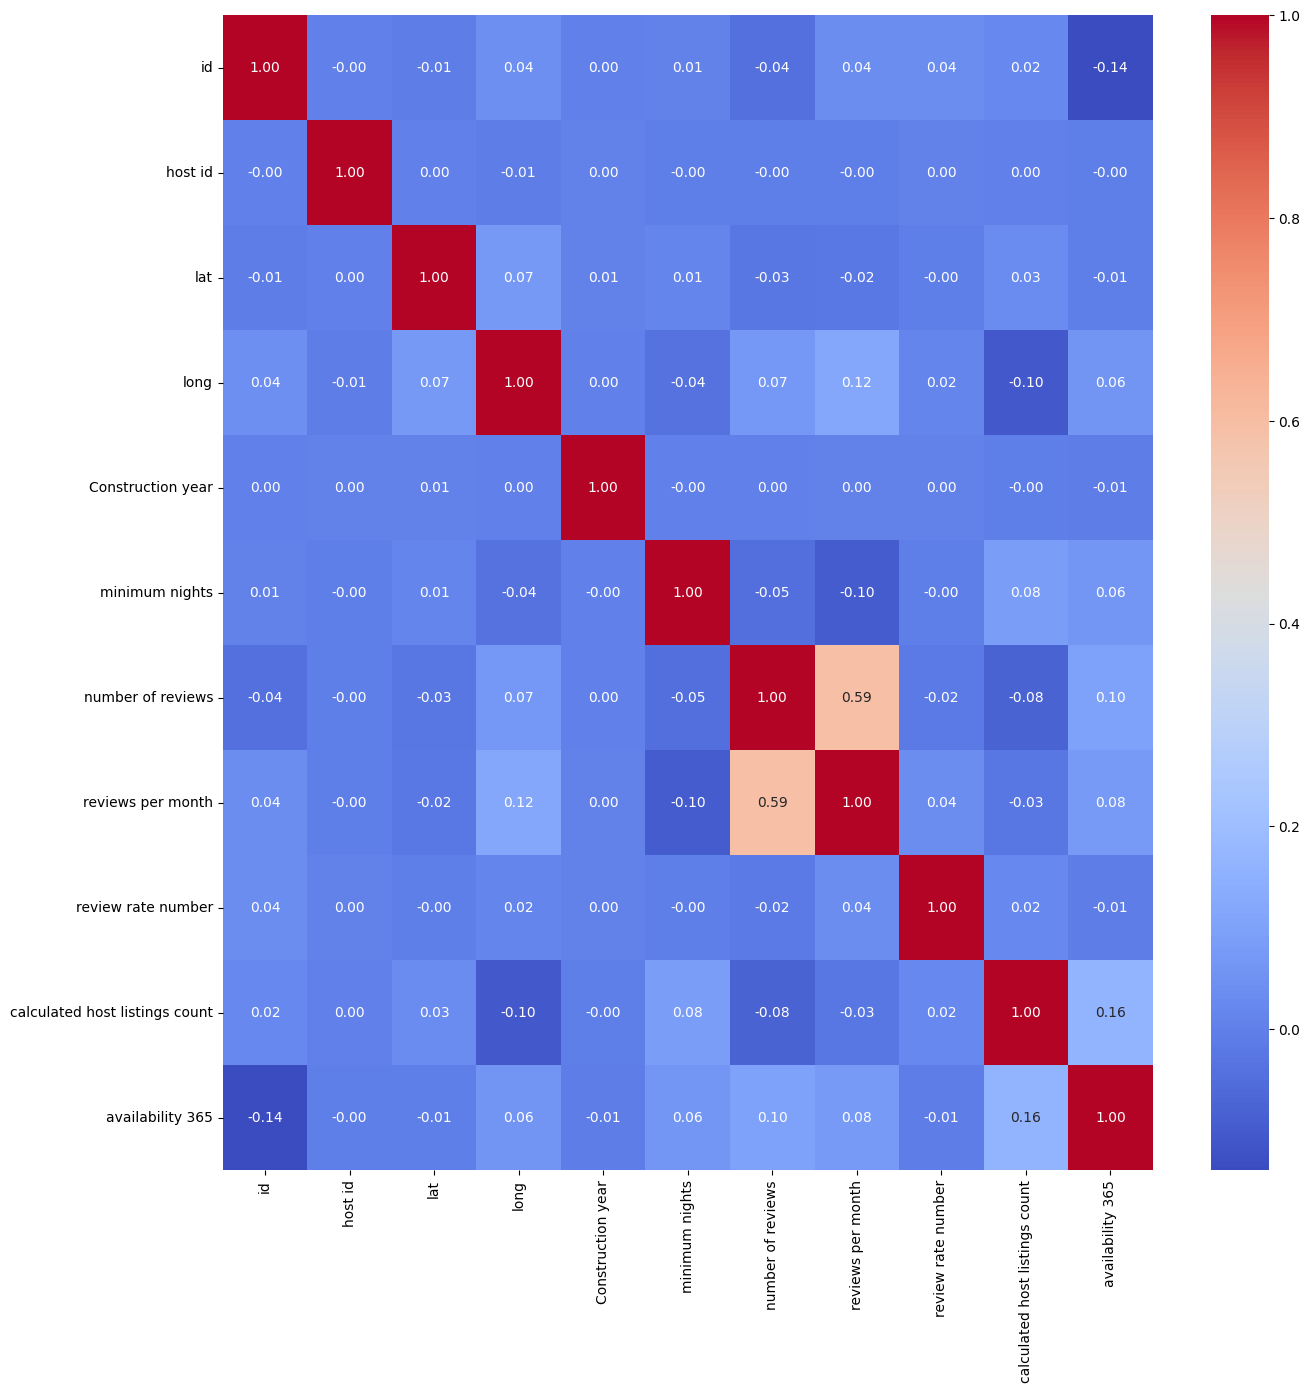

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt="0.2f")

# Daten Aufbereitung

# Ideen zur Datenbereinigung

## 1. Duplikate
- **Komplette Duplikate löschen**

---

## 2. Spaltenübersicht und Behandlung

| **Spalte**                          | **Fehlerrate** | **Vorgehen**                                                                                 |
|-------------------------------------|----------------|----------------------------------------------------------------------------------------------|
| **id**                              | 0.000000       | Nichts zu tun                                                                               |
| **NAME**                            | 0.243667       | Wenn nicht gegeben, Zeile entfernen                                                        |
| **host id**                         | 0.000000       | Nichts zu tun                                                                               |
| **host_identity_verified**          | 0.281679       | Zeilen entfernen oder durch "Unbekannt" ersetzen / NA lassen                               |
| **host name**                       | 0.395715       | Ignorieren oder durch "Unbekannt" / NA ersetzen                                            |
| **neighbourhood group**             | 0.028265       | Ignorieren                                                                                  |
| **neighbourhood**                   | 0.015595       | Ignorieren                                                                                  |
| **lat**                             | 0.007797       | Auf Duplikate prüfen oder entfernen (Zeilen)                                               |
| **long**                            | 0.007797       | Auf Duplikate prüfen oder entfernen (Zeilen)                                               |
| **country**                         | 0.518524       | Irrelevant                                                                                  |
| **country code**                    | 0.127682       | Irrelevant                                                                                  |
| **instant_bookable**                | 0.102340       |                                                                                              |
| **cancellation_policy**             | 0.074075       | Ignorieren                                                                                  |
| **room type**                       | 0.000000       | Nichts zu tun                                                                               |
| **Construction year**               | 0.208579       | Als Int behandeln, Imputation, Jahr aufgrund von lat/long schätzen                         |
| **price**                           | 0.240743       | Schätzen oder durch Modell bestimmen (z. B. Lineare Regression)                            |
| **service fee**                     | 0.266084       | Wie vorheriges                                                                             |
| **minimum nights**                  | 0.398639       | Schauen nach hostnamen oder id und vergleichen wie viel nächte min. sind                                                                              |
| **number of reviews**               | 0.178364       | Ignorieren                                                                                              |
| **last review**                     | 15.490404      | Schauen ob es bei diesen überhaupt schon reviews gibt                                                                                             |
| **reviews per month**               | 15.476759      | Schauen ob es bei diesen überhaupt schon reviews gibt                                         |
| **review rate number**              | 0.317742       | Ignorieren                                                                                             |
| **calculated host listings count**  | 0.310919       | Eventuell berechnen?                                                                                             |
| **availability 365**                | 0.436651       | Ignorieren                                                                                             |
| **house_rules**                     | 50.810437      | Ignorieren                                                                                             |
| **license**                         | 99.998051      | entfernen                                                                                             |


In [ ]:
df.dropna(subset=["Name", "lat", "long"])